In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("heart.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df=data.rename(columns={'BP' : 'Blood pressure', 'FBS over 120' : 'Fasting blood suger' , 'Max HR' : 'Max heart rate' , 'Slope of ST' : 'st_slope' 
                        , 'Heart Disease' : 'target'}, errors="raise")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   Blood pressure           270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   Fasting blood suger      270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max heart rate           270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  st_slope                 270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  target                   270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df.head()

,Age,Sex,Chest pain type,Blood pressure,Cholesterol,Fasting blood suger,EKG results,Max heart rate,Exercise angina,ST depression,st_slope,Number of vessels fluro,Thallium,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
df.shape

(270, 14)

In [9]:
#checking null values

df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
Blood pressure             0
Cholesterol                0
Fasting blood suger        0
EKG results                0
Max heart rate             0
Exercise angina            0
ST depression              0
st_slope                   0
Number of vessels fluro    0
Thallium                   0
target                     0
dtype: int64

In [10]:
df['target'].value_counts()

Absence     150
Presence    120
Name: target, dtype: int64

In [11]:
df['target'].value_counts()/df.shape[0]*100

Absence     55.555556
Presence    44.444444
Name: target, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
print (label_encoder)

LabelEncoder()


In [15]:
df["target"] = label_encoder.fit_transform(df["target"])

In [16]:
df.corr()['target'].sort_values(ascending=False)

target                     1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
st_slope                   0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
Blood pressure             0.155383
Cholesterol                0.118021
Fasting blood suger       -0.016319
Max heart rate            -0.418514
Name: target, dtype: float64

Text(0.5, 1.05, 'Target variable distribution')

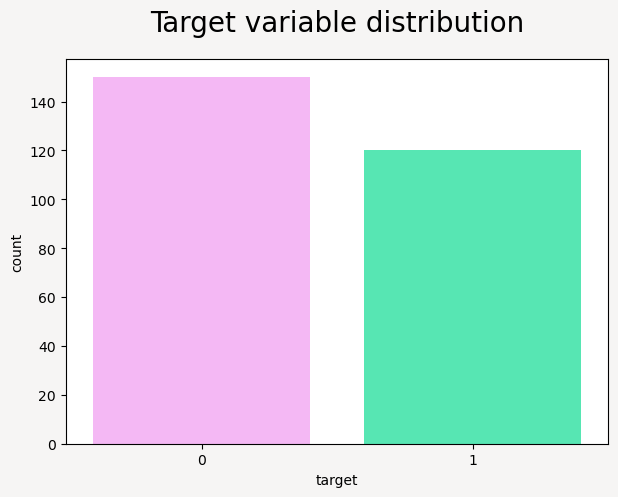

In [17]:
mypal=['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
plt.figure(figsize=(7,5),facecolor='#F6F5F4')
ax=sns.countplot(x=df['target'],palette=mypal[1::4])

ax.set_title("Target variable distribution", fontsize=20, y=1.05)

In [18]:
corr_df=df[['Thallium','Number of vessels fluro','Exercise angina','Max heart rate']]

<Axes: >

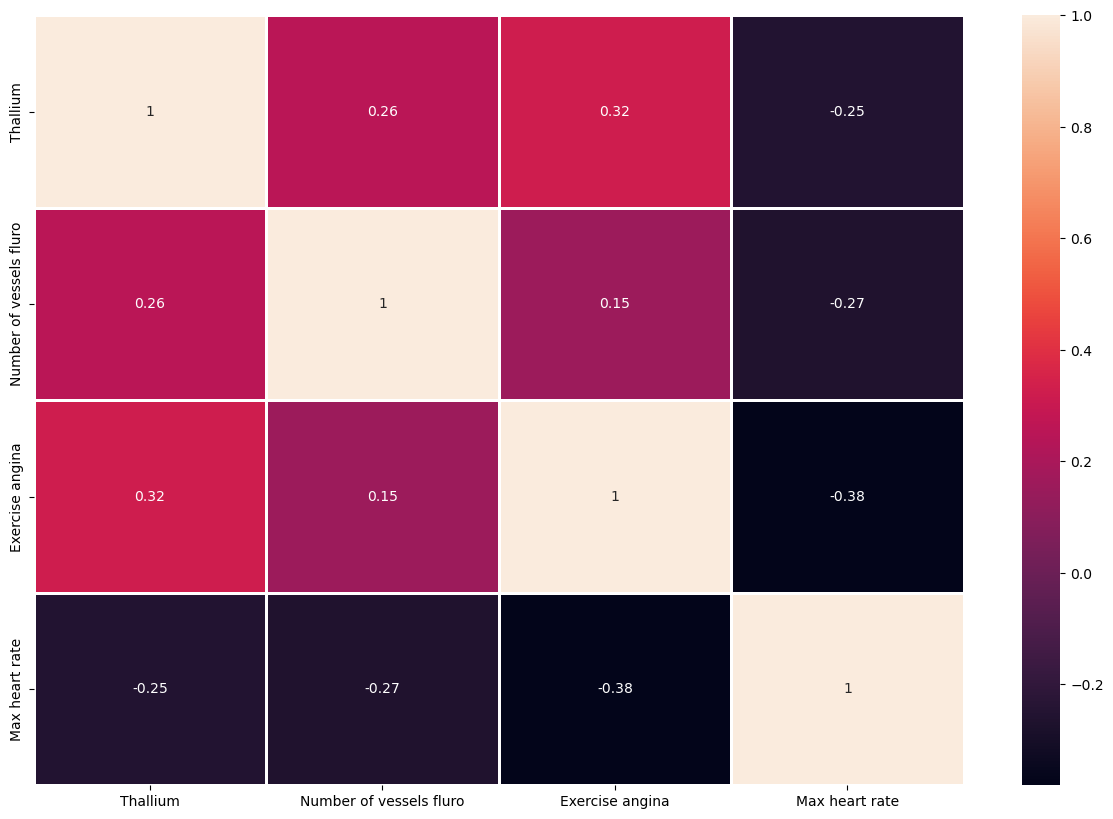

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(),annot=True,linewidth=2)

<Axes: >

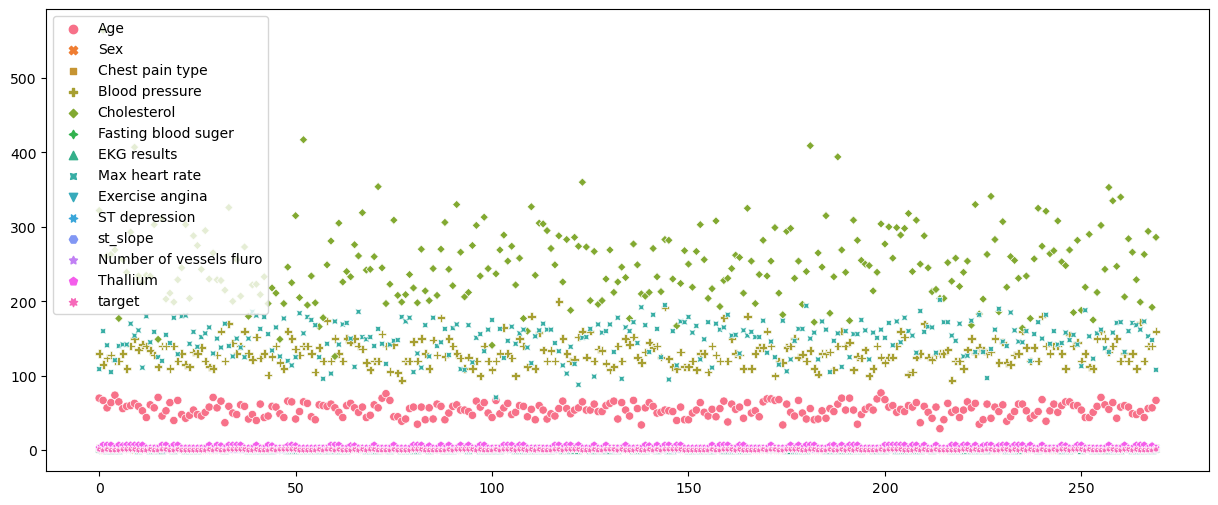

In [20]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data=df)

<Axes: xlabel='Max heart rate', ylabel='Blood pressure'>

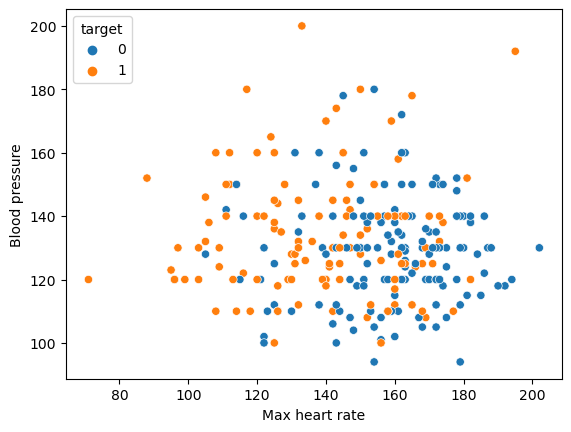

In [21]:
sns.scatterplot(data=df, x='Max heart rate', y='Blood pressure', hue='target')

In [22]:
categorical_features = ['Sex', 'Fasting blood suger', 'Exercise angina']

numerical_features = ['Age', 'Chest pain type', 'Blood pressure', 'Cholesterol', 'EKG results', 'Max heart rate', 'ST depression' ,
                     'st_slope' , 'Number of vessels fluro', 'Thallium']



print('Categorical Features are : ', categorical_features)

print('Continuous Features are : ', numerical_features)

Categorical Features are :  ['Sex', 'Fasting blood suger', 'Exercise angina']
Continuous Features are :  ['Age', 'Chest pain type', 'Blood pressure', 'Cholesterol', 'EKG results', 'Max heart rate', 'ST depression', 'st_slope', 'Number of vessels fluro', 'Thallium']


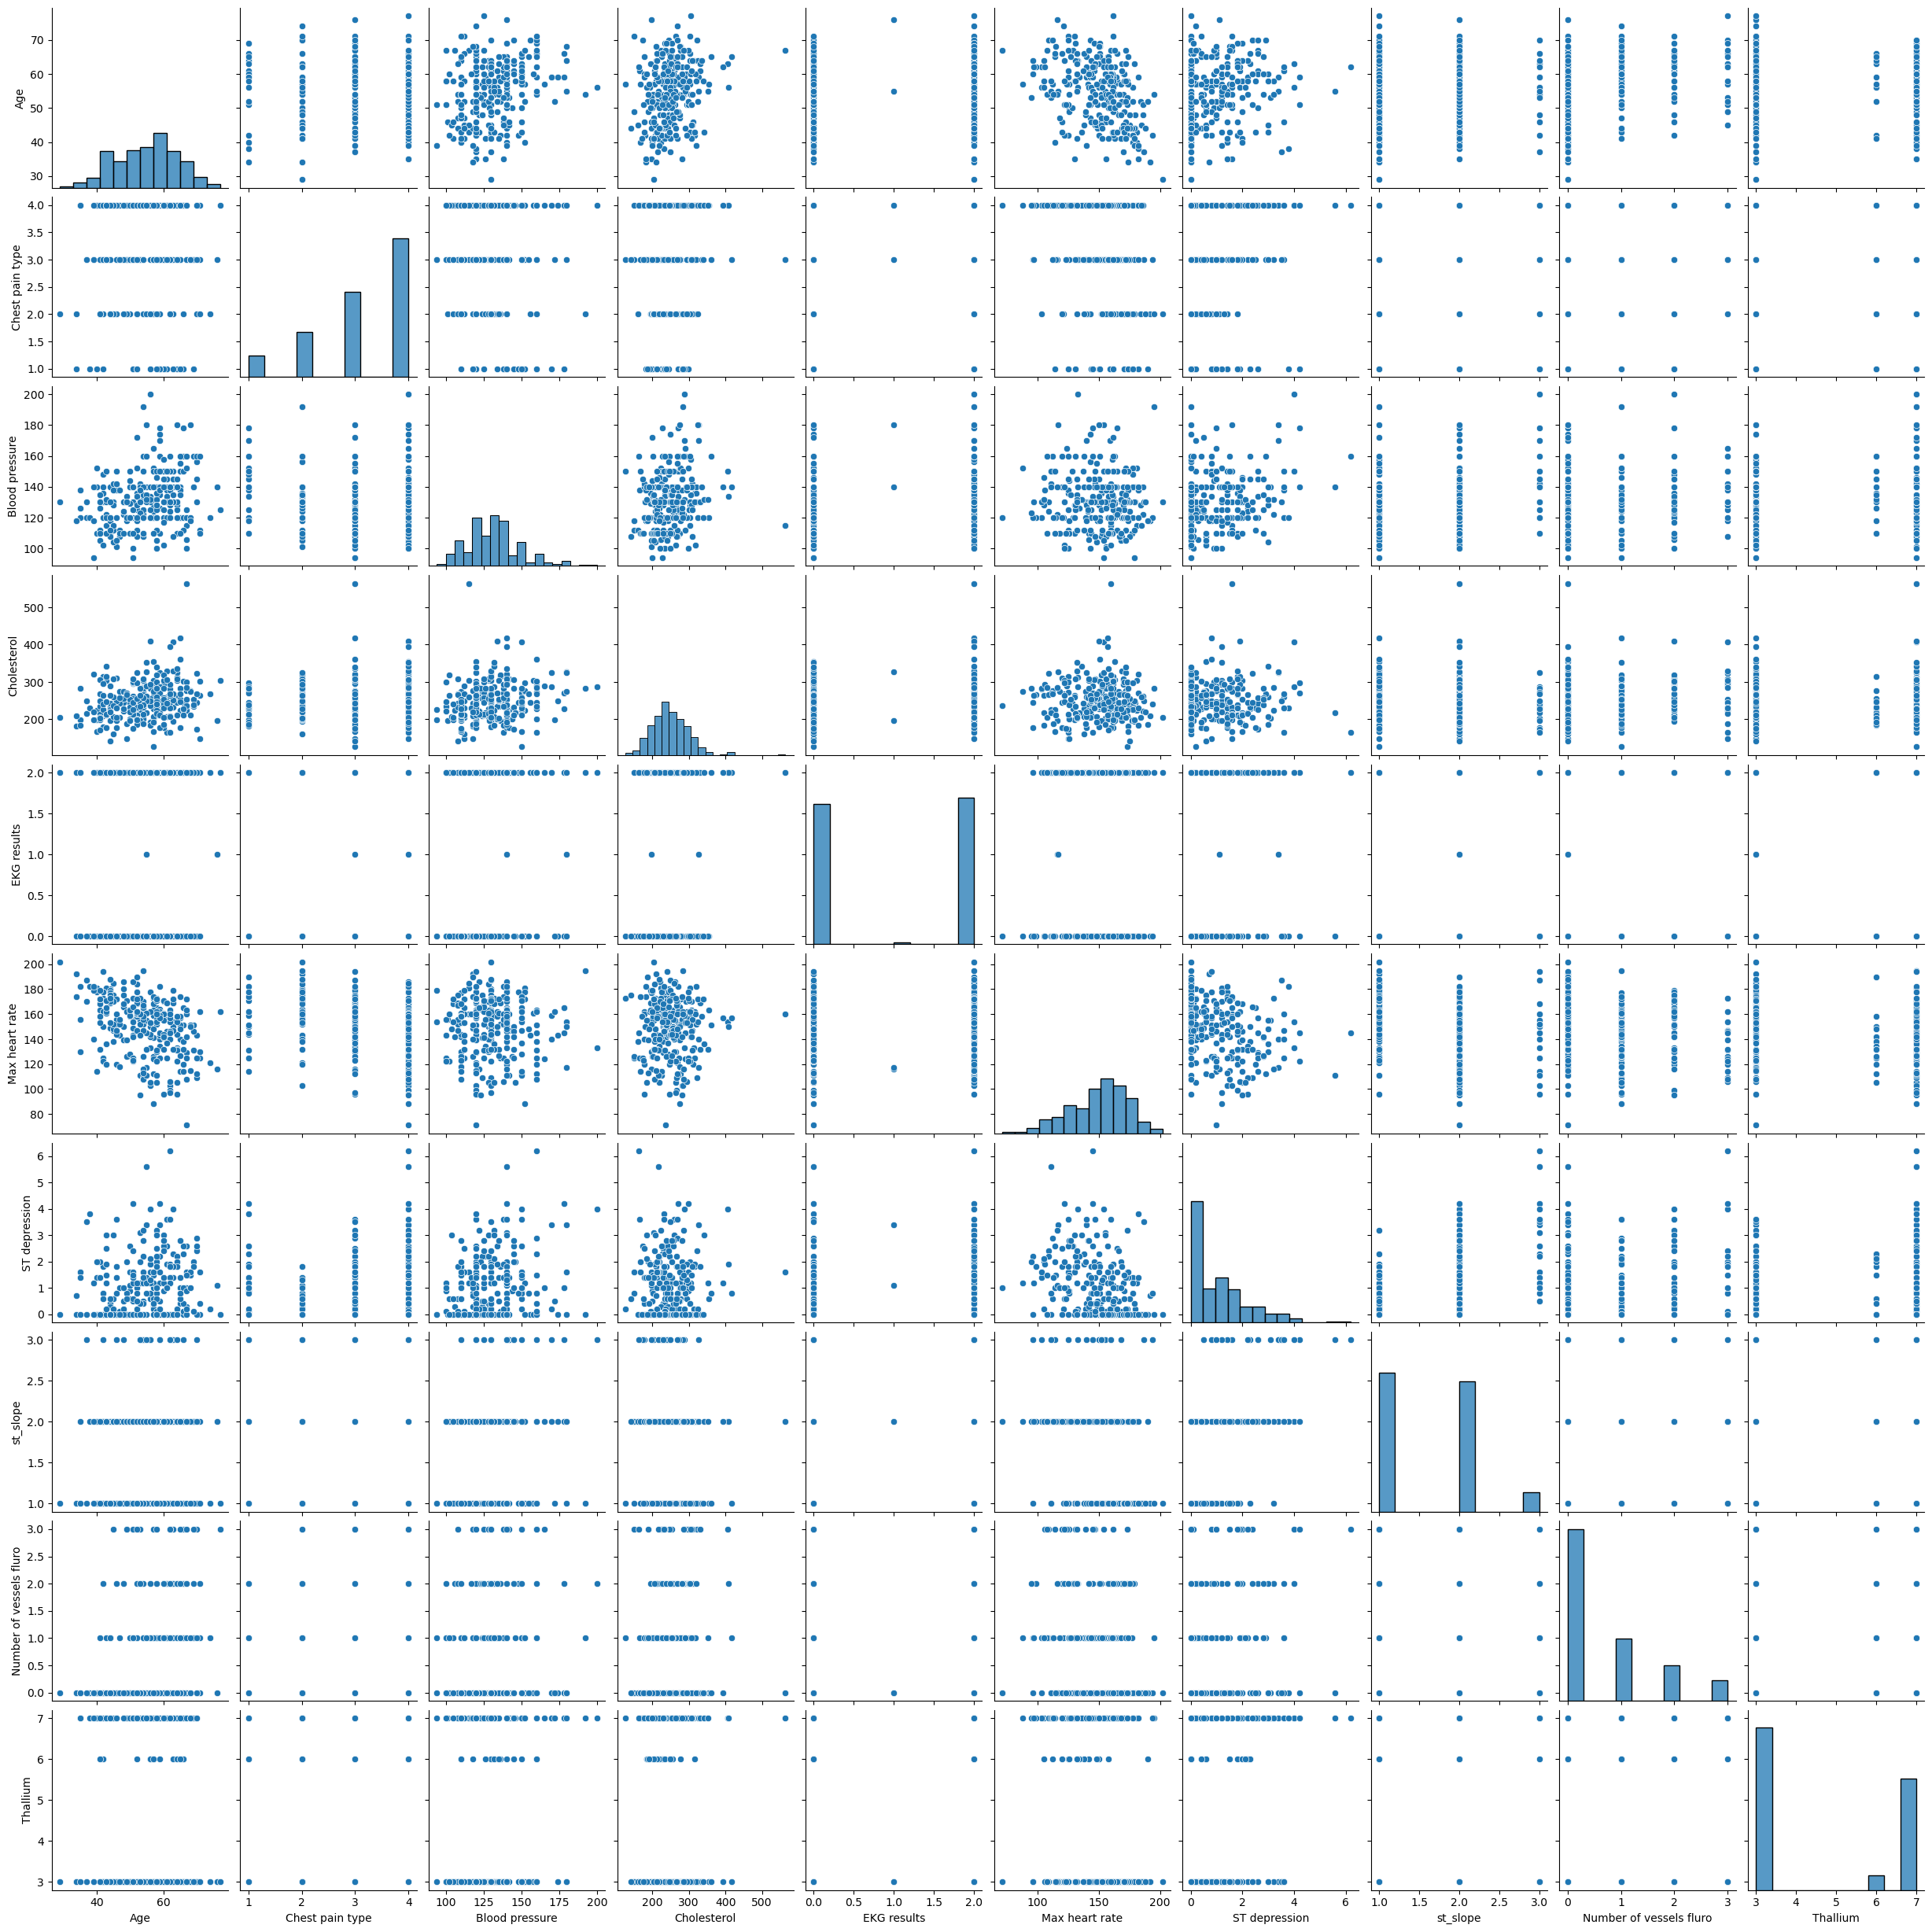

In [23]:
# Visulaizing Numerical Features

sns.pairplot(df[['Age' ,'Chest pain type', 'Blood pressure', 'Cholesterol', 'EKG results', 'Max heart rate', 'ST depression' ,'st_slope' , 'Number of vessels fluro', 'Thallium']])

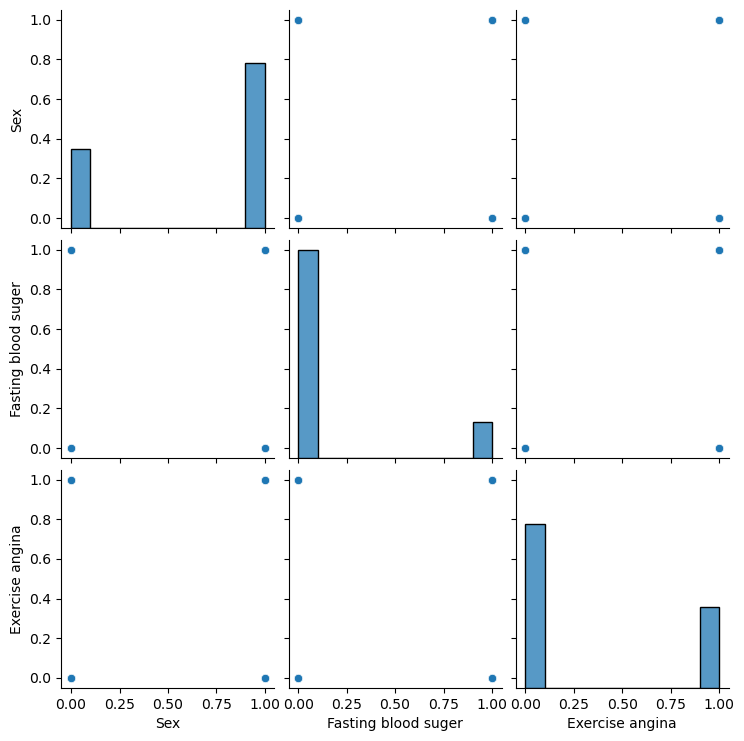

In [24]:
# Visulaizing Categorical Features

sns.pairplot(df[['Sex', 'Fasting blood suger', 'Exercise angina']])

<Axes: >

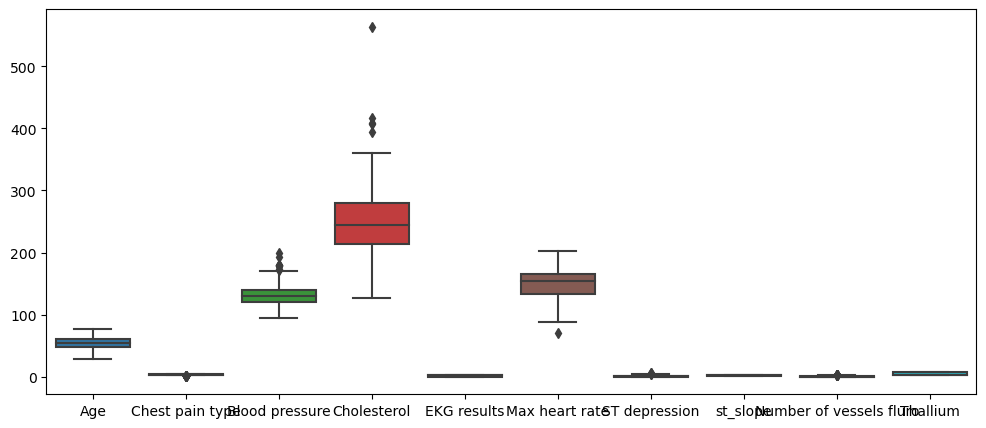

In [25]:
plt.figure(figsize = (12, 5))

sns.boxplot(df[['Age' ,'Chest pain type', 'Blood pressure', 'Cholesterol', 'EKG results', 'Max heart rate', 'ST depression' ,'st_slope' , 'Number of vessels fluro', 'Thallium']])

In [26]:
def outliers(df,Target, feature, T):
    #q1, q3, max, min, IQR, mide
    #upperbound
    
    q1=df[df[Target]==T][feature].quantile(0.25)
    q3 = df[df[Target]==T][feature].quantile(0.75)
    
    iqr = q3 - q1
    
    ub = (q3 +(1.5 * iqr))
    lb=(q1 - (1.5*iqr))
    
    return ub

In [27]:
def upperbound(df,Target, feature):
    ubs=[]
    for T in range(len(df[feature].unique())):
        ubs.append(outliers(df,Target,feature,T))
    return ubs

In [28]:
def boxplot(df,Target, feature):
    fig = plt.figure( figsize=(8, 6))
    ax = fig.add_axes([0,0,1,1])
    sns.boxplot(ax=ax, data=df, x=Target, y=feature,flierprops=dict(marker='o', markersize=6),fliersize=2)
    
    y = upperbound(df,Target, feature)

    ax.axhline(y[0],color='b')
    ax.axhline(y[1],color='orange')
    ax.axhline(y[2],color='g')

In [29]:
def drop_outliers(df,Target, feature):
    ubs=[]
    ubs=upperbound(df,Target, feature)
    
    for T in range(len(df[feature].unique())):
        
        df = df.drop(index= df[ df[Target] == T ][feature][df[feature] > ubs[T]].index, axis=0)
    
    return df

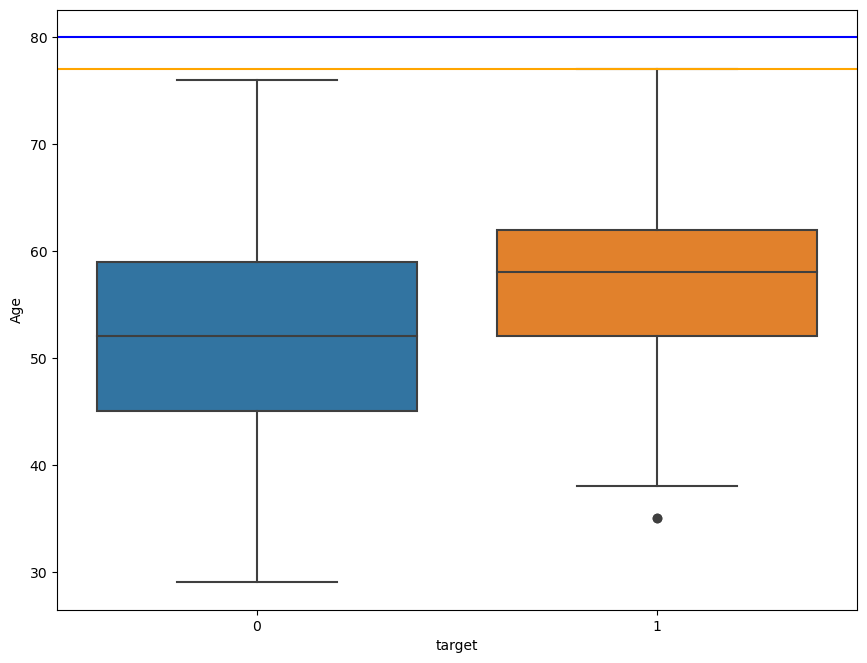

In [30]:
boxplot(df, 'target', 'Age')

In [31]:
df = drop_outliers(df, 'target', 'Age')

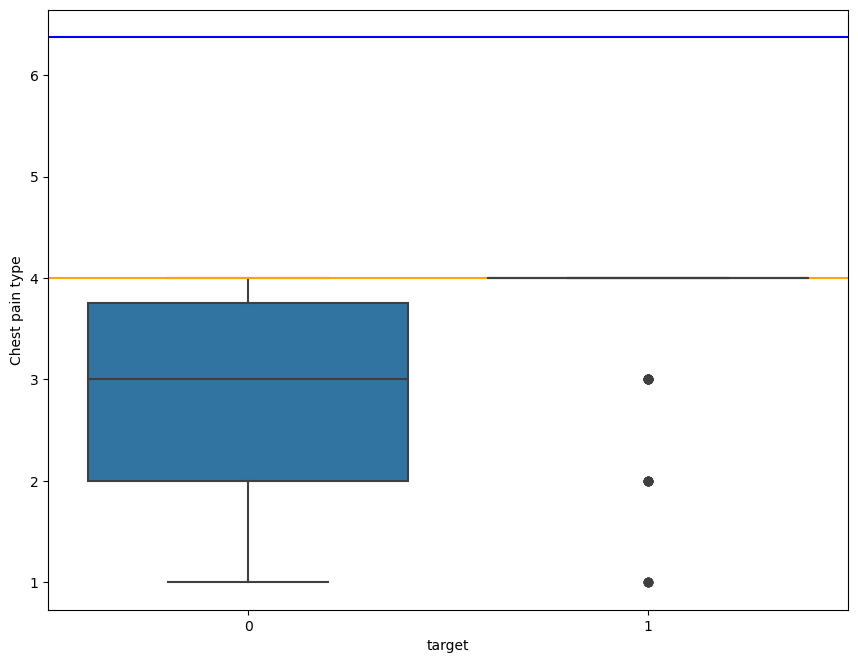

In [32]:
boxplot(df , 'target', 'Chest pain type')

In [33]:
df = drop_outliers(df, 'target', 'Chest pain type')

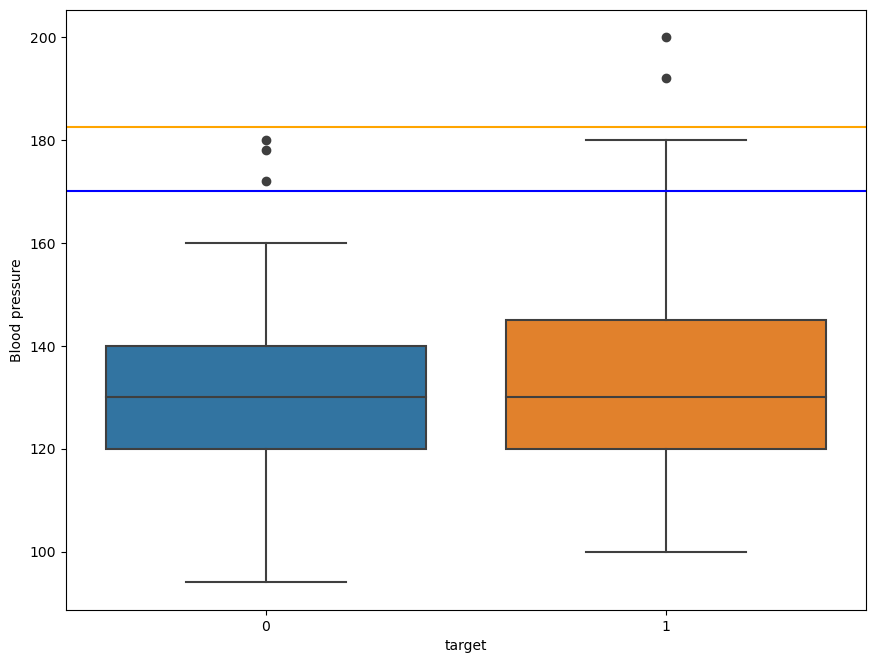

In [34]:
boxplot(df , 'target' , 'Blood pressure')

In [35]:
df = drop_outliers(df , 'target' , 'Blood pressure')

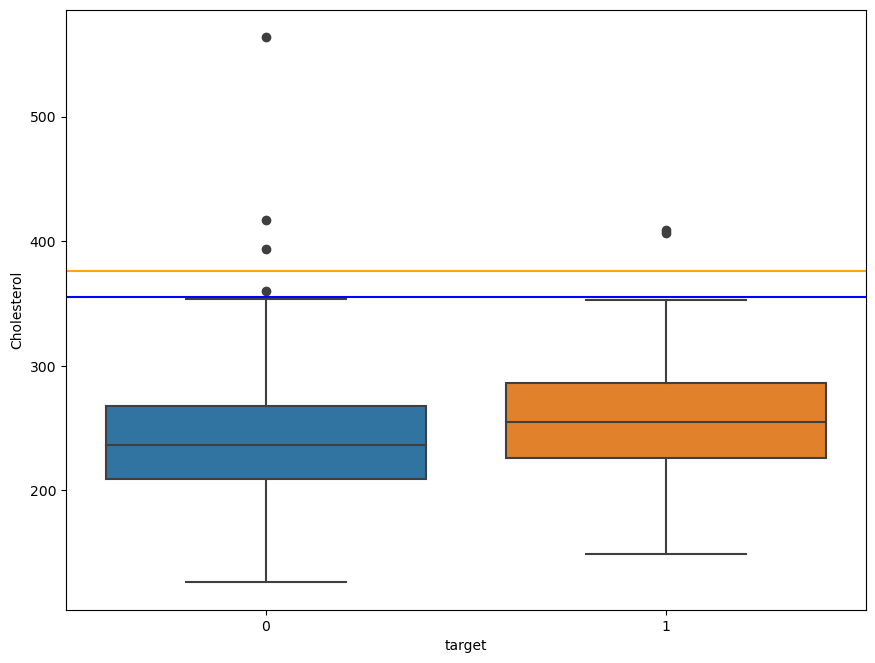

In [36]:
boxplot(df , 'target' , 'Cholesterol')

In [37]:
df = drop_outliers (df, 'target' , 'Cholesterol')

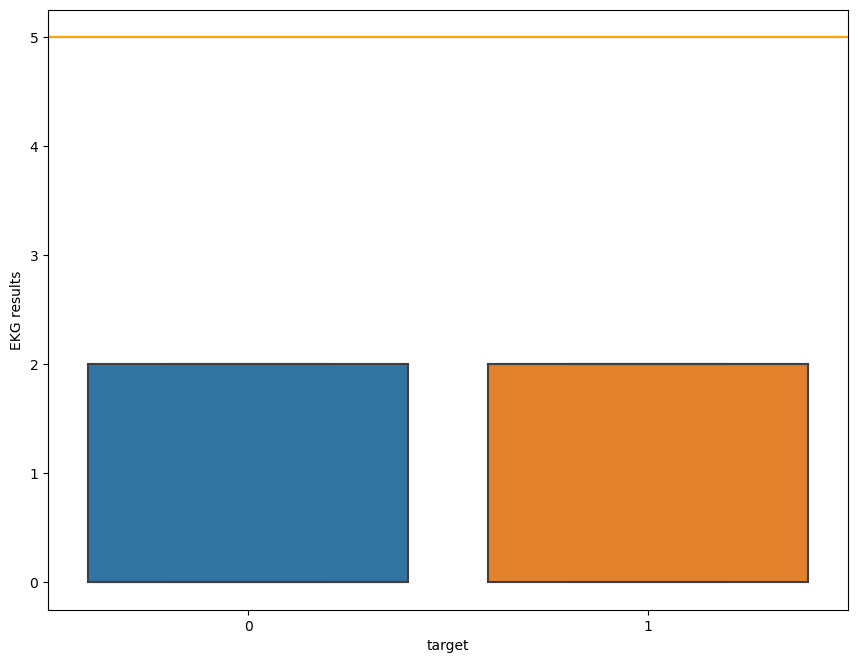

In [38]:
boxplot(df , 'target' , 'EKG results')

In [39]:
df = drop_outliers(df, 'target' , 'EKG results')

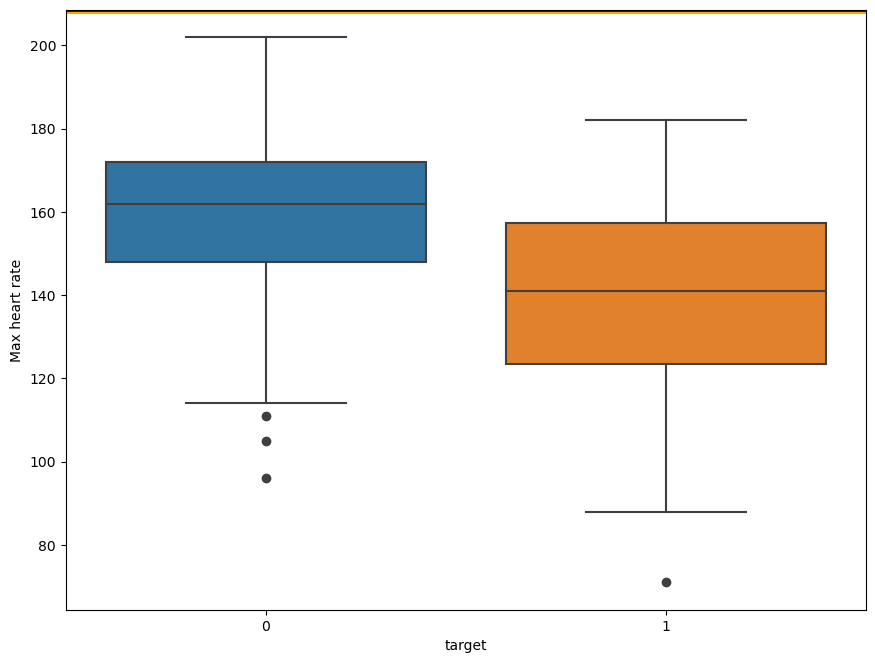

In [40]:
boxplot(df, 'target', 'Max heart rate')

In [41]:
df = drop_outliers(df, 'target', 'Max heart rate')

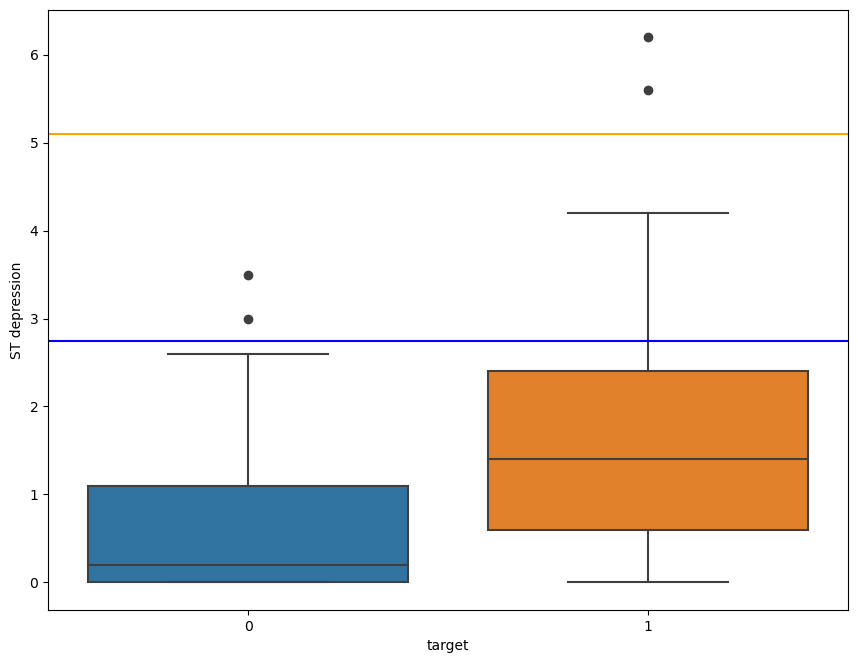

In [42]:
boxplot(df , 'target' ,'ST depression')

In [43]:
df = drop_outliers(df, 'target' , 'ST depression')

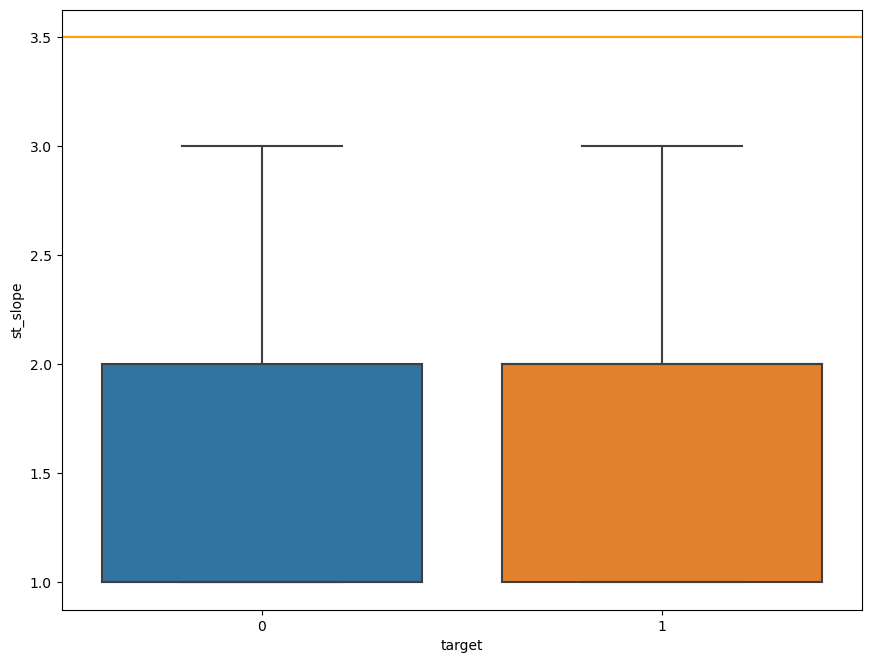

In [44]:
boxplot(df, 'target' , 'st_slope')

In [45]:
df = drop_outliers(df , 'target', 'st_slope')

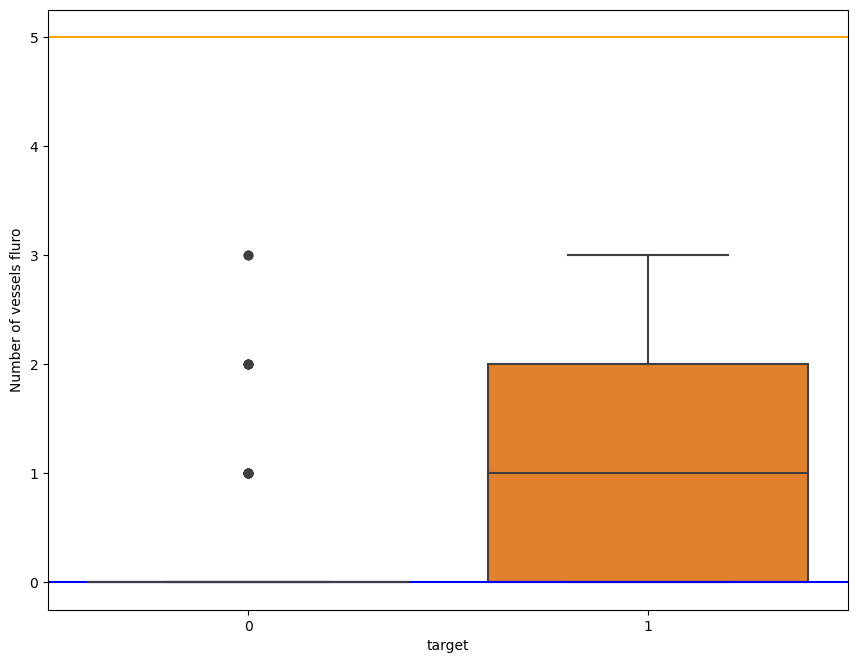

In [46]:
boxplot(df, 'target' , 'Number of vessels fluro')

In [47]:
df = drop_outliers(df, 'target' , 'Number of vessels fluro')

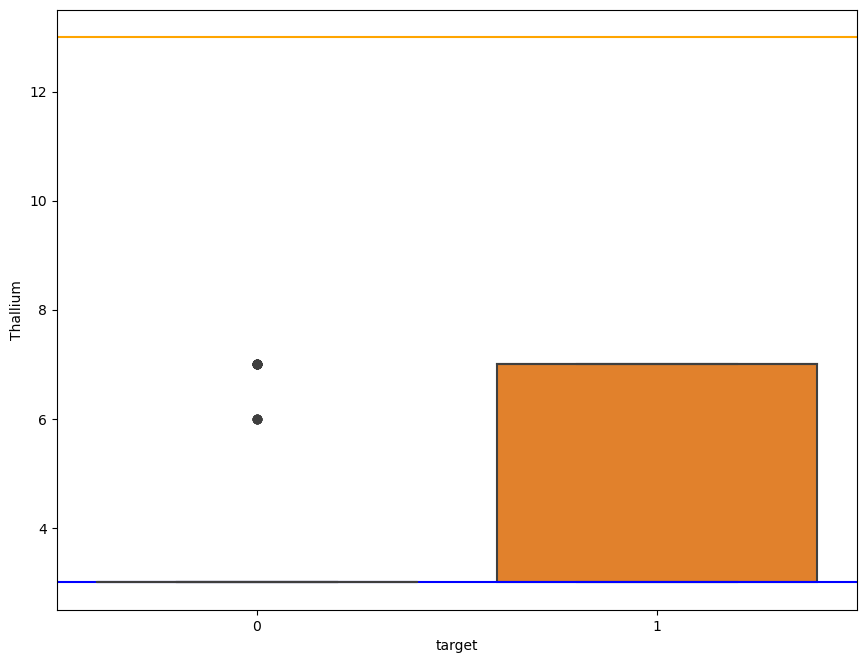

In [48]:
boxplot(df , 'target', 'Thallium')

In [49]:
df = drop_outliers(df , 'target', 'Thallium')

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler= StandardScaler()

In [52]:
#scale selected data

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [53]:
df.head()

,Age,Sex,Chest pain type,Blood pressure,Cholesterol,Fasting blood suger,EKG results,Max heart rate,Exercise angina,ST depression,st_slope,Number of vessels fluro,Thallium,target
0,1.771951,1,0.805954,-0.023772,1.720424,0,0.938206,-1.634841,0,1.272181,0.683526,2.531438,-0.807595,1
2,0.345786,1,-1.430980,-0.396812,0.325158,0,-1.076468,-0.307117,0,-0.715428,-1.037947,-0.662871,1.277841,1
6,0.236081,1,-0.312513,-0.023772,0.210792,1,0.938206,-0.265626,1,-0.431484,0.683526,0.401898,0.756482,1
7,0.565196,1,0.805954,-1.267239,-0.178052,0,0.938206,-0.265626,1,0.136405,0.683526,0.401898,1.277841,1
8,0.674901,1,0.805954,0.597961,1.057101,0,0.938206,0.896132,0,0.136405,0.683526,1.466668,1.277841,1


In [54]:
X=df.drop('target',axis=1)
y=df['target']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.svm import SVC

In [58]:
svm_model= SVC()

In [59]:
svm_model.fit(X_train, y_train)

SVC()

In [60]:
y_pred= svm_model.predict(X_test)

In [61]:
#The prediction Value VS Actual Value of Test Data
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred}).head(10)

,Y_Test,Y_Pred
241,0,0
204,1,1
174,0,0
75,1,1
69,1,0
201,1,1
141,0,0
191,1,1
50,1,1
82,1,1


In [62]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [63]:
accuracy_score(y_test, y_pred)

0.9354838709677419

In [64]:
confusion_matrix(y_test, y_pred)

array([[23,  0],
       [ 4, 35]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       1.00      0.90      0.95        39

    accuracy                           0.94        62
   macro avg       0.93      0.95      0.93        62
weighted avg       0.95      0.94      0.94        62



In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid, cv=5)

In [68]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [69]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [70]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [71]:
y_pred_grid= grid.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred_grid)

0.9193548387096774

In [73]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.87      0.93        39

    accuracy                           0.92        62
   macro avg       0.91      0.94      0.92        62
weighted avg       0.93      0.92      0.92        62

